In [ ]:
#Polinomiyal regresyon, 
#veriye daha iyi uyum sağlayabilecek ve karmaşık ilişkileri modelleyebilecek daha esnek bir model sunar. 
#Polinomiyal regresyon, bağımsız değişkenin daha yüksek dereceli terimlerini (kare, küp, vs.) 
#içerecek şekilde genişletir.

In [1]:

#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [5]:
# veri yukleme
veriler = pd.read_csv('maaslar.csv')
veriler.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


In [6]:
# X ve Y değişkenlerini ayarlayalım
X = veriler[['Egitim Seviyesi']] #iki köşe kullanma sebebi df olarak dondurup girdi değeridir
Y = veriler['maas'] # tek köşe seri olarak dödürür. Target değişken olduğunu belirtir.

In [7]:
#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

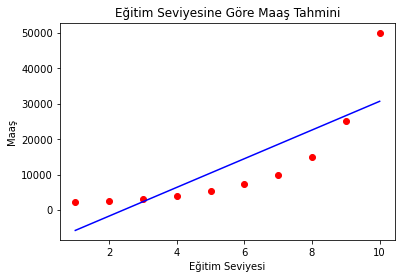

In [9]:
# X_plot'u DataFrame olarak dönüştürme ve 'Egitim Seviyesi' olarak sütun ismi verme
X_plot_df = pd.DataFrame(X_plot, columns=['Egitim Seviyesi'])
Y_pred = lin_reg.predict(X_plot_df)

# Gerçek veri noktalarını ve regresyon çizgisini çizdirme
plt.scatter(X, Y, color='red')
plt.plot(X_plot, Y_pred, color='blue')
plt.title('Eğitim Seviyesine Göre Maaş Tahmini')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Maaş')
plt.show()

In [10]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# 2. derece polinomiyal özellikler
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [11]:
# Polinomiyal regresyon modeli oluşturma ve eğitme
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

In [13]:
# Polinomiyal regresyon çizgisi için tahminler
X_plot_poly = poly_reg.transform(X_plot_df)
Y_pred_poly = lin_reg2.predict(X_plot_poly)

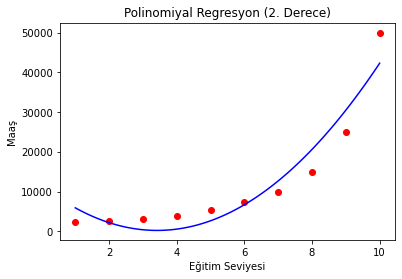

In [14]:
# Polinomiyal regresyon sonuçlarını çizdirme
plt.scatter(X, Y, color='red')
plt.plot(X_plot, Y_pred_poly, color='blue')
plt.title('Polinomiyal Regresyon (2. Derece)')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Maaş')
plt.show()

In [20]:
# Lineer regresyon modeli için tahminler
print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

# Polinomiyal regresyon modeli için tahminler
print(lin_reg2.predict(poly_reg.transform([[6.6]])))
print(lin_reg2.predict(poly_reg.transform([[11]])))
#pd ye çevirmeni istiyor hata verdi

[34716.66666667]
[16923.33333333]
[[10083.33333333]]
[[56091.66666667]]


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Doğrusal Regrasyonda
#eğitim seviyesi 11 olduğunda taahmini maaş 34.716 TL 
#eğitim seviyesi 6,6 olduğunda taahmini maaş 16.293 TL 

#Polinomiyal Regrasyonda
#eğitim seviyesi 11 olduğunda taahmini maaş 10.083 TL 
#eğitim seviyesi 6,6 olduğunda taahmini maaş 56.091 TL 